# Analyzing Earnings Based on College Majors

We'll be exploring the data set regarding the job outcomes of students who graduated from college between 2010 and 2012.  The original data set was surveyed and aggregated by [American Community Survey](https://www.census.gov/programs-surveys/acs/).  FiveThurtyEight cleaned the data set and released it on their [Github repository](https://github.com/fivethirtyeight/data/tree/master/college-majors/).

### Metadata
Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, etc.

Below are some of the columns in the dataset:
* Rank - rank by median earnings (primary key?)
* Major_code - major code
* Major - major description
* Major_category - category of major
* Total - total number of people with major
* Sample_size - sample size (unweighted) of full-time
* Men - number of male graduates
* Women - number of female graduates
* ShareWomen - number of women as share of total
* Employed - number of employed graduates
* Median - median salary of full-time, year-round workers
* Low_wage_jobs - number of low-wage service jobs
* Full_time - number of graduates employed 35 hours or more per week
* Part_time - number of graduates employed less than 35 hours per week

## Exploring the Data Set

Let's examine a few rows from the data set and generate some statistics regarding the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
recent_grads.describe()

raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print("Number of rows before removal", raw_data_count)
print("Number of rows after removal", cleaned_data_count)

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma



### Sample Size vs Median Salary

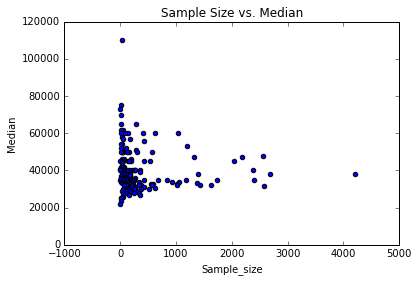

In [2]:
recent_grads.plot(x="Sample_size", y="Median", kind="scatter", title="Sample Size vs. Median")

### Sample Size vs. Unemployment Rate

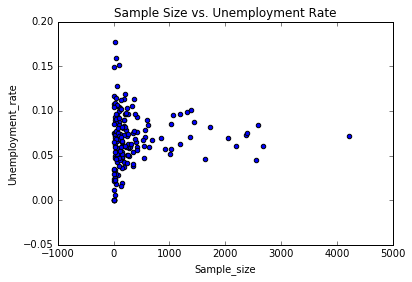

In [3]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter", title="Sample Size vs. Unemployment Rate")

### Full Time Employment vs. Median Salary

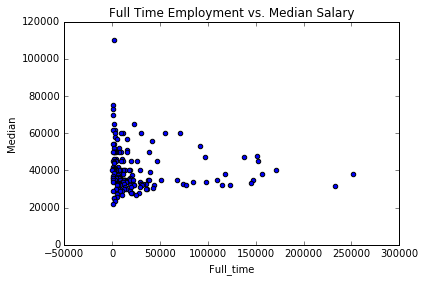

In [4]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter", title="Full Time Employment vs. Median Salary")

### ShareWomen vs. Unemployment Rate

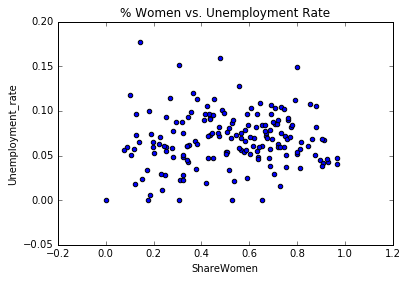

In [5]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter", title="% Women vs. Unemployment Rate")

### Men vs. Median

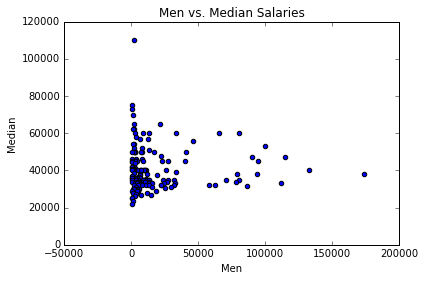

In [6]:
recent_grads.plot(x="Men", y="Median", kind="scatter", title="Men vs. Median Salaries")

### Women vs. Median Salaries

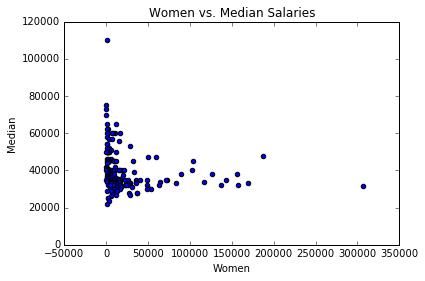

In [7]:
recent_grads.plot(x="Women", y="Median", kind="scatter", title="Women vs. Median Salaries")

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

## Histograms

### Sample Size

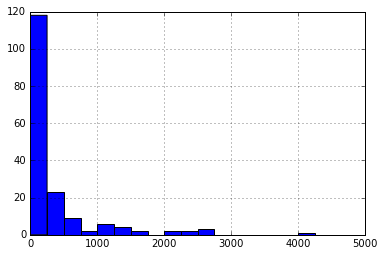

In [8]:
recent_grads["Sample_size"].hist(bins=20, range=(0,5000))

### Median Salary

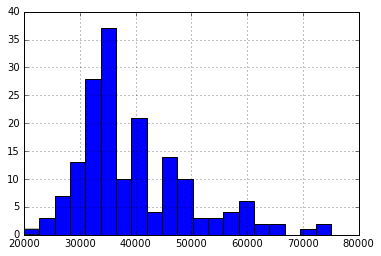

In [9]:
recent_grads["Median"].hist(bins=20, range=(20000,75000))

### Employed

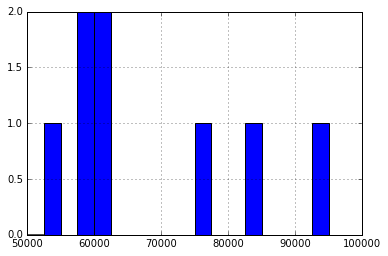

In [10]:
recent_grads["Employed"].hist(bins=20, range=(50000,100000))

### ShareWomen

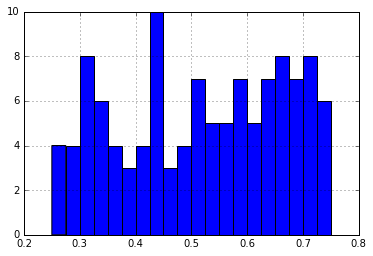

In [11]:
recent_grads["ShareWomen"].hist(bins=20, range=(.25, .75))

### Unemployment Rate

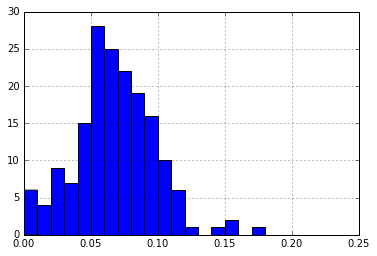

In [12]:
recent_grads["Unemployment_rate"].hist(bins=20, range=(0, .20))

### Men

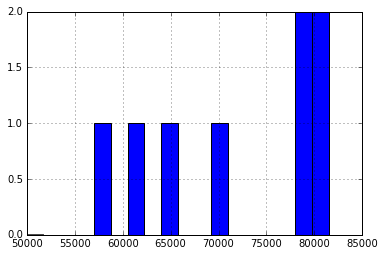

In [13]:
recent_grads["Men"].hist(bins=20, range=(50000, 85000))

### Women

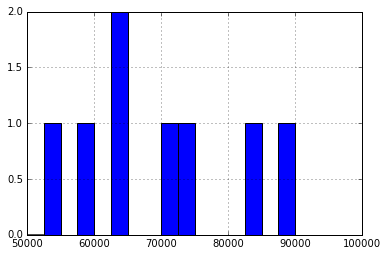

In [14]:
recent_grads["Women"].hist(bins=20, range=(50000, 100000))

## Analysis of data

* What percent of majors are predominantly male?
* What percent of majors are predominantly female?
* What is the most common median salary range?

### Scatter Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96975240f0>,
      dtype=object)

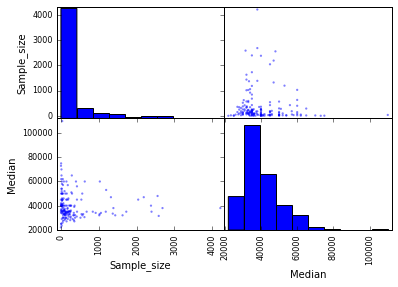

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size", "Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9696866f60>,
      dtype=object)

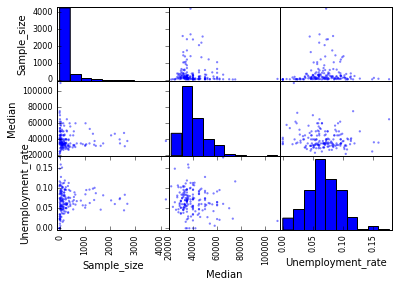

In [18]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]])

### Analysis of scatter plots



### Bar Plots

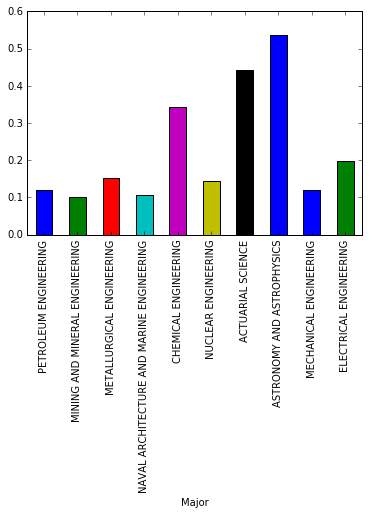

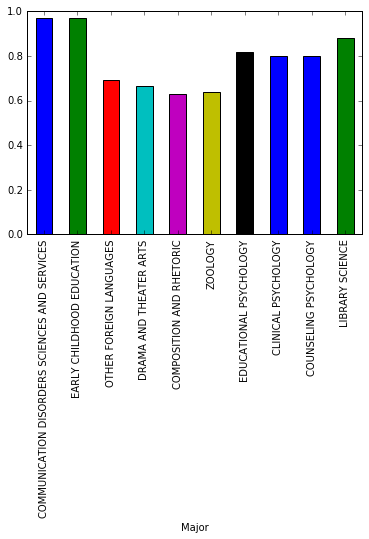

In [20]:
recent_grads[:10].plot.bar(x="Major", y="ShareWomen", legend=False)
recent_grads[-10:].plot.bar(x="Major", y="ShareWomen", legend=False)

### Major vs. Unemployment Rate

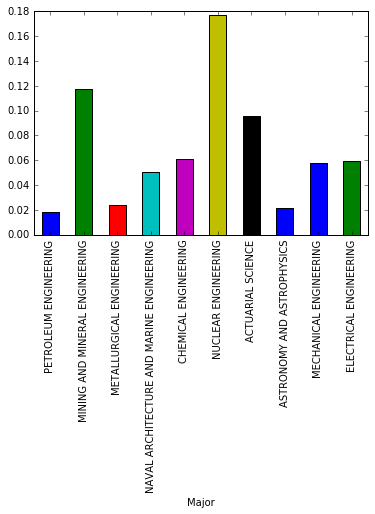

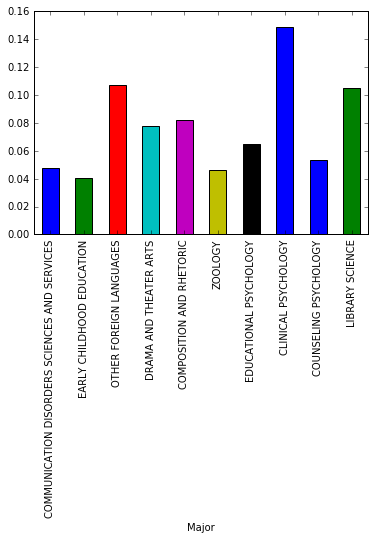

In [21]:
recent_grads[:10].plot.bar(x="Major", y="Unemployment_rate", legend=False)
recent_grads[-10:].plot.bar(x="Major", y="Unemployment_rate", legend=False)